# Problema 1

In [2]:
from scipy.stats import uniform

In [3]:
def my_rand_vals(valori, probabilitati,N): 
    X=[]
    U = uniform.rvs(size=N)
    for i in range(N):
        pozitie = 0 
        sum_prob = probabilitati[0]
        while U[i] > sum_prob:         #  U[i] <= sum_prob
            pozitie+=1
            sum_prob+=probabilitati[pozitie]      
        X.append(valori[pozitie])      # atunci X.append(valori[pozitie-1])
    return X

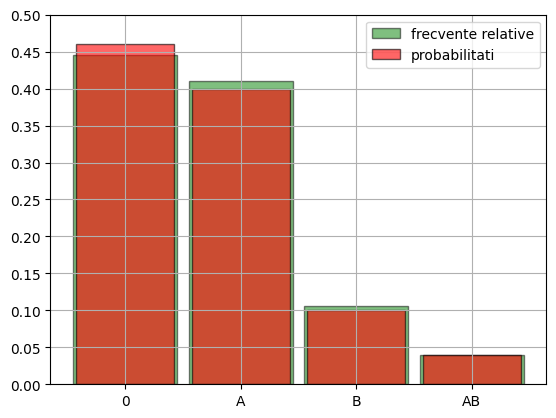

In [7]:
from matplotlib.pyplot import bar, show, hist, grid, legend, xticks, yticks
valori, probabilitati = range(4), (0.46, 0.40, 0.10, 0.04)

data = my_rand_vals(valori,probabilitati,1000)
bin_edges = [i+0.5 for i in range(-1,4)]
hist(data, bin_edges, density = True, rwidth=0.9, color ='green', 
     edgecolor='black', alpha = 0.5, label='frecvente relative')

distribution = dict([(k,probabilitati[k]) for k in range(4)])
bar(distribution.keys(),distribution.values(), width=0.85,color='red',
    edgecolor='black',alpha=0.6, label='probabilitati')

xticks(ticks=range(4),labels=("0","A","B","AB"))
yticks([k/100 for k in range(0,55,5)])
legend(loc='upper right')
grid()
show()

# Problema 2

In [1]:
from scipy.stats import uniform
from math import log

In [2]:
def my_exp_rand_vals(alpha,N):
    U = uniform.rvs(size=N)
    X = [-1/alpha*log(1-U[i]) for i in range(N)]
    return X

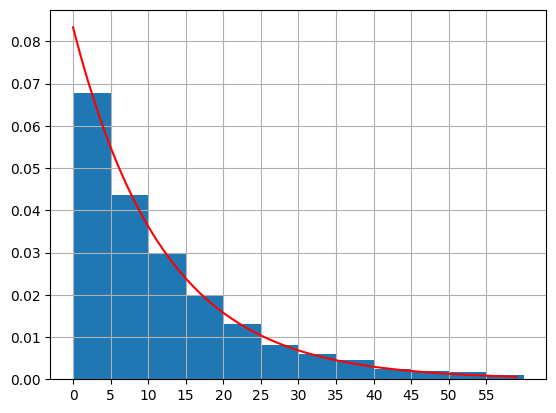

In [6]:
from matplotlib.pyplot import show, hist, grid, legend, xticks, plot
from scipy.stats import expon

alpha = 1/12

data = my_exp_rand_vals(alpha,2000) 
#or data = expon.rvs(loc=0,scale=12,size=1000)
hist(data, bins=12, density = True,range=(0,60))

x = range(60)
plot(x,expon.pdf(x,loc=0,scale=1/alpha),'r-')

xticks(range(0,60,5))
grid()
show()

In [7]:
sum([x>=5 for x in data])/len(data)

0.664

In [8]:
1-expon.cdf(5,loc=0,scale=1/alpha)

np.float64(0.6592406302004438)